
## Google analytics customer revenue predictions
### By Ahmed Eweed  

### You can find me on github at [github.com/AhmedEweed](https://github.com/AhmedEweed)

    I re approached the dataset as I explored it in many ways
    and this version is the updated version of my exploration

In [18]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
# load dataset with the option to specify which column to flatten from json and the datatypes of each column
def load_df(csv_path=None, Json=[], dtype = {}):
    JSON_COLUMNS = Json
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype=dtype,
                     )
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [2]:
#load dataset
df = load_df('../train.csv', ['totals'])
df.head()

Loaded train.csv. Shape: (903653, 17)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.131660e+18,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,1,1,NaN,1
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3.773060e+17,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,1,1,NaN,1
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.895550e+18,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,1,1,NaN,1
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4.763450e+18,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,1,1,NaN,1
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2.729440e+16,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,NaN,1,NaN,1


In [3]:
# look up the datatypes present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 17 columns):
channelGrouping              903653 non-null object
date                         903653 non-null int64
device                       903653 non-null object
fullVisitorId                903653 non-null float64
geoNetwork                   903653 non-null object
sessionId                    903653 non-null object
socialEngagementType         903653 non-null object
trafficSource                903653 non-null object
visitId                      903653 non-null int64
visitNumber                  903653 non-null int64
visitStartTime               903653 non-null int64
totals.bounces               450630 non-null object
totals.hits                  903653 non-null object
totals.newVisits             703060 non-null object
totals.pageviews             903553 non-null object
totals.transactionRevenue    11515 non-null object
totals.visits                903653 non-null object
dtypes: f

In [4]:
# convert revenue to float
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

In [5]:
# extract only numeric values of revenue
df_part = df[df['totals.transactionRevenue'] > 0.0]

In [6]:
# reset the index of the the new extracted dataset
df_part = df_part.reset_index(drop = True)

In [7]:
# look up the date column format
df_part['date'].head()

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

In [8]:
# convert date to the right format
df_part['date'] = pd.to_datetime(df_part['date'], format = '%Y%m%d')   

In [9]:
# save extracted dataset
df_part.to_csv('revenue_data.csv', index = False)

In [140]:
# load our brand new dataset
df_part = load_df('revenue_data.csv', ['device', 'geoNetwork', 'trafficSource'], {'fullVisitorId': 'str'})

Loaded revenue_data.csv. Shape: (11515, 54)


In [141]:
# look at the dataset
df_part.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,2016-09-02,6.19419e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,NaN,11,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
1,Organic Search,2016-09-02,5.32717e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,NaN,11,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Referral,2016-09-02,8.88505e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,NaN,13,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
3,Referral,2016-09-02,1.85468e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,NaN,13,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
4,Referral,2016-09-02,3.24489e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,NaN,17,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com


In [142]:
# look at datatypes
df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 54 columns):
channelGrouping                                      11515 non-null object
date                                                 11515 non-null object
fullVisitorId                                        11515 non-null object
sessionId                                            11515 non-null object
socialEngagementType                                 11515 non-null object
visitId                                              11515 non-null int64
visitNumber                                          11515 non-null int64
visitStartTime                                       11515 non-null int64
totals.bounces                                       0 non-null float64
totals.hits                                          11515 non-null int64
totals.newVisits                                     4465 non-null float64
totals.pageviews                                     11515 non-null int64

In [143]:
# look at each cloumn's values to drop any empty or irrelevant ones
#### I have commented the code for it is no longer needed but I left it for documenting my steps

# for item in df_part.columns:
#    print(df_part[item].value_counts())



In [144]:
# drop empty and not needed columns
df_part = df_part.drop(['geoNetwork.networkLocation',
              'geoNetwork.latitude',
              'geoNetwork.longitude',
              'trafficSource.adwordsClickInfo.criteriaParameters',
              'socialEngagementType',
              'totals.bounces',
              'device.browserSize',
              'device.browserVersion',
              'device.flashVersion',
              'device.language',
              'device.mobileDeviceBranding',
              'device.mobileDeviceInfo',
              'device.mobileDeviceModel',
              'device.mobileInputSelector',
              'device.mobileDeviceMarketingName',
              'device.operatingSystemVersion',
              'device.screenColors',
              'device.screenResolution',
              'geoNetwork.cityId'], axis = 1)

In [145]:
# rename columns 
df_part.rename(columns ={'channelGrouping':'channel',
                         'totals.hits':'hits',
                         'totals.newVisits':'newvisits',
                         'totals.pageviews':'pageviews',
                         'totals.transactionRevenue':'revenue(millions)', 
                         'totals.visits':'visits',
                         'device.browser':'browser',
                         'device.deviceCategory':'devicecategory', 
                         'device.isMobile':'ismobile',
                         'device.operatingSystem':'os',
                         'geoNetwork.city':'city', 
                         'geoNetwork.continent':'continent',
                         'geoNetwork.country':'country', 
                         'geoNetwork.metro':'metro',
                         'geoNetwork.networkDomain':'networkdomain',
                         'geoNetwork.region':'region',
                         'geoNetwork.subContinent':'subcontinent',
                         'trafficSource.adContent':'adContent',
                         'trafficSource.adwordsClickInfo.adNetworkType':'adNetworkType',
                         'trafficSource.adwordsClickInfo.gclId':'gclId',
                         'trafficSource.adwordsClickInfo.isVideoAd':'isVideoAd',
                         'trafficSource.adwordsClickInfo.page':'page',
                         'trafficSource.adwordsClickInfo.slot':'slot', 'trafficSource.campaign':'campaign',
                         'trafficSource.isTrueDirect':'istruedirect', 'trafficSource.keyword':'keyword',
                         'trafficSource.medium':'medium', 'trafficSource.referralPath':'referalpath',
                         'trafficSource.source':'source'}, inplace = True)

In [146]:
# look at the dataset
df_part.tail()

,channel,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,hits,newvisits,pageviews,...,gclId,isVideoAd,page,slot,campaign,istruedirect,keyword,medium,referalpath,source
11510,Referral,2017-01-04,6.8496e+18,6849604863010168468_1483566314,1483566314,10,1483566314,61,NaN,48,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
11511,Referral,2017-01-04,2.11987e+17,0211986650009953276_1483568879,1483568879,2,1483568879,66,NaN,30,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
11512,Referral,2017-01-04,9.98156e+18,9981562221973608723_1483576938,1483576938,1,1483576938,122,1.0,90,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/,mall.googleplex.com
11513,Direct,2017-01-04,9.63126e+17,963126344221316701_1483552674,1483552674,3,1483552674,130,NaN,90,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
11514,Direct,2017-01-04,9.77144e+18,9771437221362506189_1483538997,1483538997,12,1483538997,237,NaN,169,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)


In [149]:
# convert revenue to float
df_part['revenue(millions)'] = df_part['revenue(millions)'].astype(float)

# convert revenue to millions by dividing each value by 10^6
df_part['revenue(millions)'] = df_part['revenue(millions)']/1000000

# find the min, max and average revenue in our data
df_part['revenue(millions)'].describe()

count    11515.000000
mean       133.744789
std        448.285227
min          0.010000
25%         24.930000
50%         49.450000
75%        107.655000
max      23129.500000
Name: revenue(millions), dtype: float64

In [150]:
# group the data by revenue sum for each channel
groups = df_part.groupby('channel')['revenue(millions)'].sum()
groups

channel
(Other)                9.99
Affiliates           597.38
Direct            434840.55
Display            78337.46
Organic Search    326380.51
Paid Search        43558.90
Referral          651429.91
Social              4916.54
Name: revenue(millions), dtype: float64

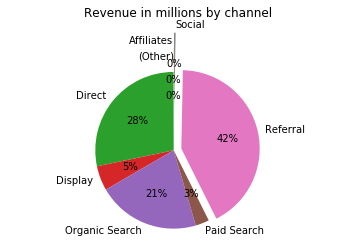

In [193]:
# draw a pie chart of how much revenue earned through each channel
labels = groups.index
sizes = groups.values
explode = (0.1,0.3,0,0,0,0,0.1,0.5)
plt.pie(sizes, labels=labels, explode = explode, startangle = 90, autopct = '%1.0f%%')
plt.title('Revenue in millions by channel')
plt.axis('equal')
plt.show()

from above we can see that most revenue comes from `Referral` channel, then `Direct` and `Organic`

In [194]:
df_part['date'].describe()

count          11515
unique           365
top       2016-12-16
freq              87
Name: date, dtype: object

In [198]:
#sorted(df_part['date'].unique())